In [1]:
%matplotlib inline
import cv2
from pathlib import Path
import gc
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from IPython.display import clear_output
from keras.models import load_model

clear_output()
import keras_ocr 


In [2]:
model = load_model("model.h5")

In [3]:
#file path dataset
path = Path('data')
filepath = list(path.glob(r'**/*.jpg'))
filepath = filepath[:30] # total data size only 30
gc.collect()

126

In [4]:
column_filepath = pd.Series(filepath, name='image_path').astype(str)
train = pd.DataFrame(column_filepath)
train= train.sample(frac = 1).reset_index(drop=True) # all shuffle 
train.head()

,image_path
0,data\AB1352TQ.jpg
1,data\L1772VY.jpg
2,data\OnlyPlate9.jpg
3,data\AA8414PB_AF.jpg
4,data\AA8414PB.jpg


path= data\AB1352TQ.jpg
path= data\L1772VY.jpg
path= data\OnlyPlate9.jpg
path= data\AA8414PB_AF.jpg
path= data\AA8414PB.jpg
path= data\AB1449KB.jpg


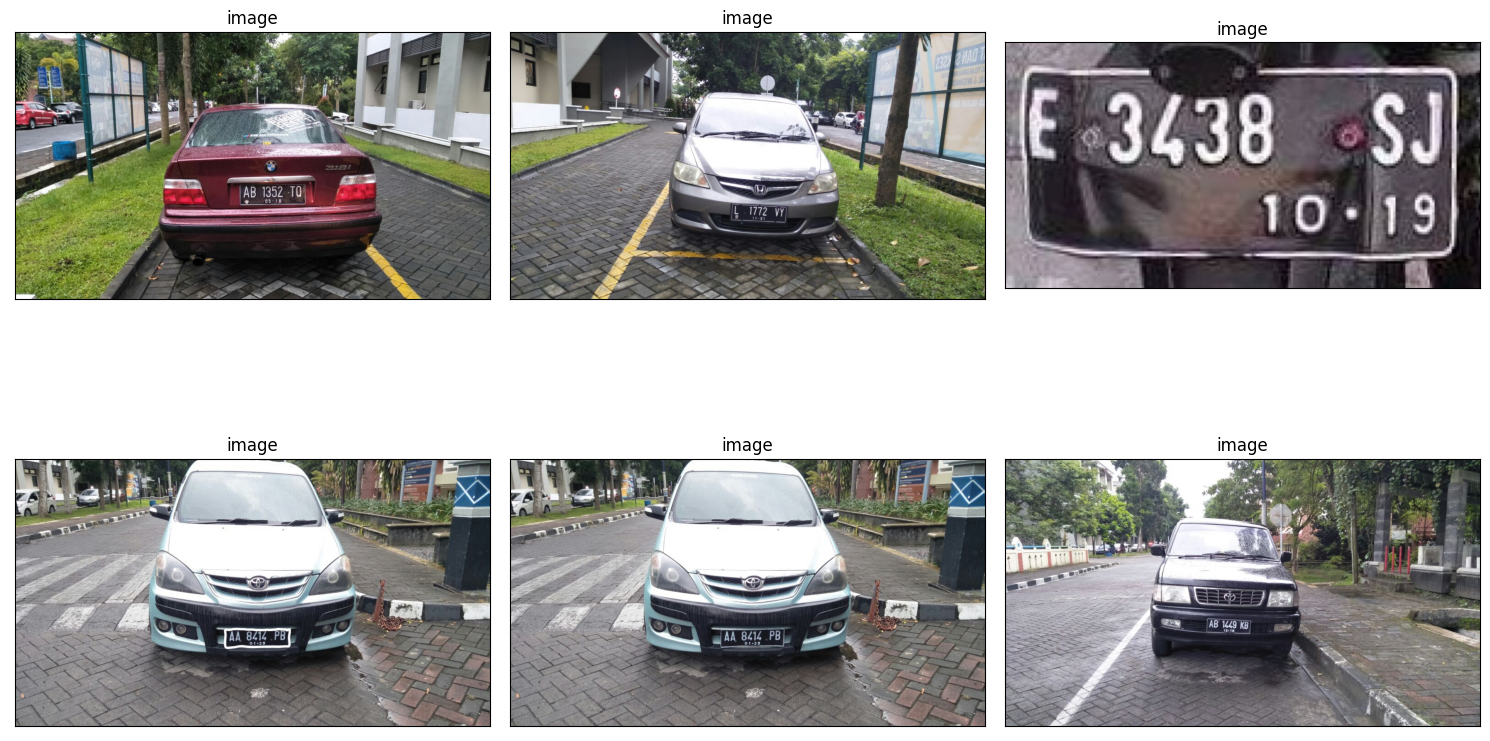

In [5]:
f,a = plt.subplots(nrows=2, ncols=3,figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    path = train.iloc[i]["image_path"]
    print("path=",path)
    ax.imshow(keras_ocr.tools.read(path))
    ax.set_title("image")
    
plt.tight_layout()
plt.show()

In [6]:
image_path_list = train[:6]["image_path"]
images = [ keras_ocr.tools.read(image_path) for image_path in image_path_list]

gc.collect()

0

In [7]:
pipline = keras_ocr.pipeline.Pipeline() 
keras_ocr_preds = pipline.recognize(images)

gc.collect()

Looking for C:\Users\Erlangga RM\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Erlangga RM\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step


13507

34868

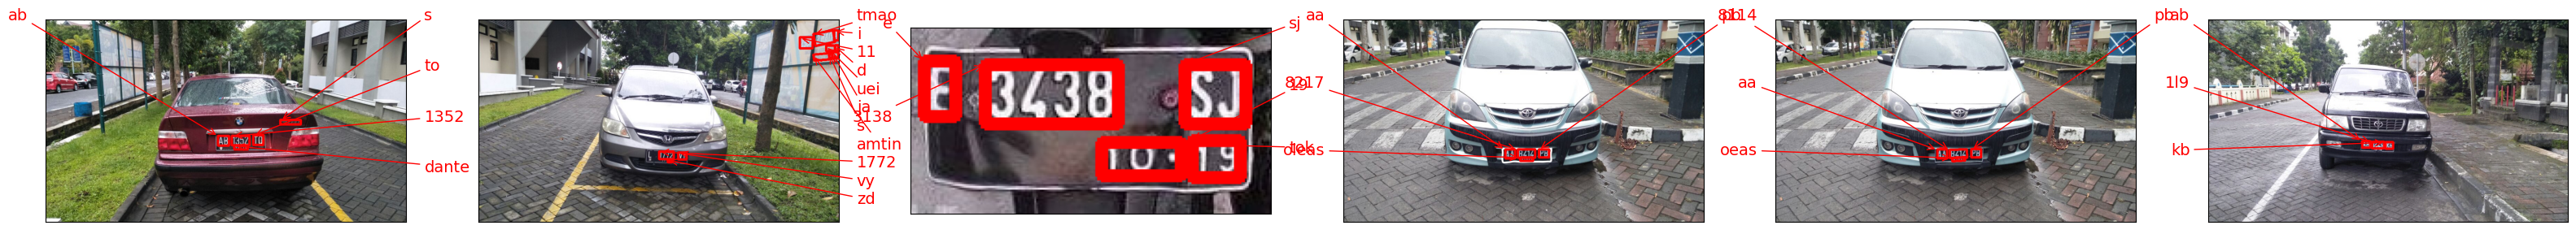

In [23]:
fig,axs = plt.subplots(1, 6 , figsize = (40,40))
for ax , image,  pred in zip(axs , images , keras_ocr_preds):
    keras_ocr.tools.drawAnnotations(image, pred, ax)
    
gc.collect()